In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [320]:
df = pd.read_csv('russian_demography.csv')
df

,year,region,npg,birth_rate,death_rate,gdw,urbanization
0,1990,Republic of Adygea,1.9,14.2,12.3,84.66,52.42
1,1990,Altai Krai,1.8,12.9,11.1,80.24,58.07
2,1990,Amur Oblast,7.6,16.2,8.6,69.55,68.37
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63
4,1990,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01
...,...,...,...,...,...,...,...
2375,2017,Chuvash Republic,-1.3,11.3,12.6,76.63,62.00
2376,2017,Chukotka Autonomous Okrug,3.7,13.1,9.4,58.23,70.00
2377,2017,Sakha (Yakutia) Republic,6.4,14.5,8.1,70.10,65.50
2378,2017,Yamalo-Nenets Autonomous Okrug,9.1,14.0,4.9,53.57,83.70


In [321]:
df.describe()
df = df.dropna(subset=['npg'])

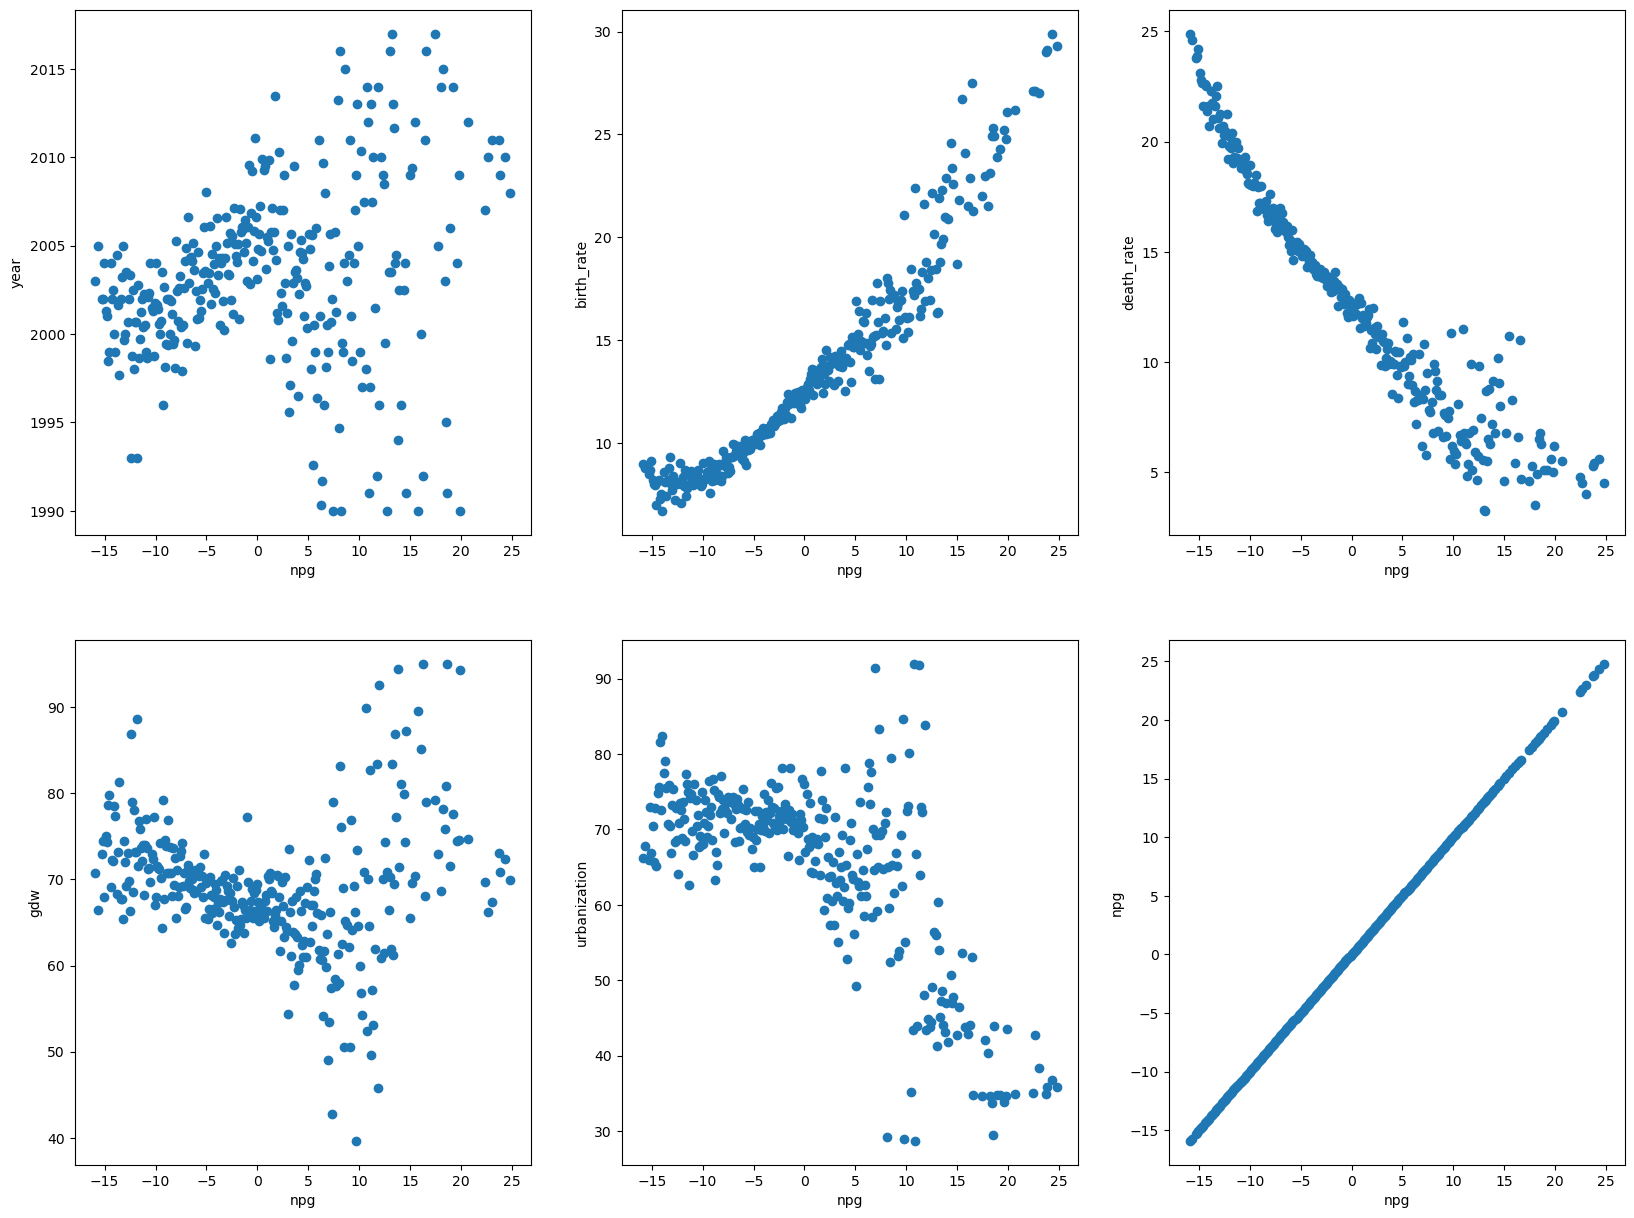

In [322]:
rows, cols = 2, 3
fig, axs = plt.subplots(rows, cols, figsize=(20, 15))

col_name = [ 'year', 'birth_rate', 'death_rate', 'gdw', 'urbanization', 'npg']
count = 0
for i in range(rows):
    for j in range(cols):
        urban_mean = df.groupby(by = 'npg')[col_name[count]].mean()
        x = list(urban_mean.index.tolist())
        y = list(urban_mean.tolist())
        axs[i][j].scatter(x, y)
        axs[i][j].set_xlabel('npg')
        axs[i][j].set_ylabel(col_name[count])
        count+=1
    
plt.show()

In [323]:
X = df[['year', 'birth_rate', 'death_rate', 'gdw', 'urbanization']].values
y = df['npg'].values

In [324]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X = imputer.fit_transform(X)

In [325]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
np.isnan(X_train).any()

False

In [326]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [327]:
coeff_df = pd.DataFrame(regressor.coef_,['npg', 'birth_rate', 'death_rate', 'gdw', 'urbanization'], columns=['Coefficient'])
coeff_df

,Coefficient
npg,-0.001120
birth_rate,1.006903
death_rate,-0.995596
gdw,-0.001470
urbanization,-0.000006


При увеличении на год так изменятся значения  
Наиболее оптимальные коэффициенты для всех атрибутов

In [328]:
y_pred = regressor.predict(X_test)

In [329]:
d = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
d

,Actual,Predicted
0,2.6,2.575231
1,-4.3,-4.300092
2,-2.4,-2.399563
3,9.3,9.400932
4,6.7,6.720493
...,...,...
459,-8.1,-8.116500
460,-7.0,-7.028857
461,-0.4,-0.375692
462,-2.4,-2.407173


In [330]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) # среднее значение абсолютного значения ошибок. 
# (сумма (каждого Actual и Predicted) разделить на количество)

Mean Absolute Error: 0.0570348205366003


In [331]:
new_value = []
for i in ['year', 'birth_rate', 'death_rate', 'gdw', 'urbanization']:
    new_value.append(float(input("\nВведите значение входного параметра " + i + ": ")))
print("\nПредсказанный npg: ", regressor.predict([new_value]))


Введите значение входного параметра year:  2004

Введите значение входного параметра birth_rate:  15

Введите значение входного параметра death_rate:  10

Введите значение входного параметра gdw:  73

Введите значение входного параметра urbanization:  70



Предсказанный npg:  [5.006676]


In [305]:
regressor.coef_

array([-1.12036961e-03,  1.00690339e+00, -9.95596275e-01, -1.47013463e-03,
       -6.14037815e-06])

In [306]:
regressor.intercept_

2.212058187883207

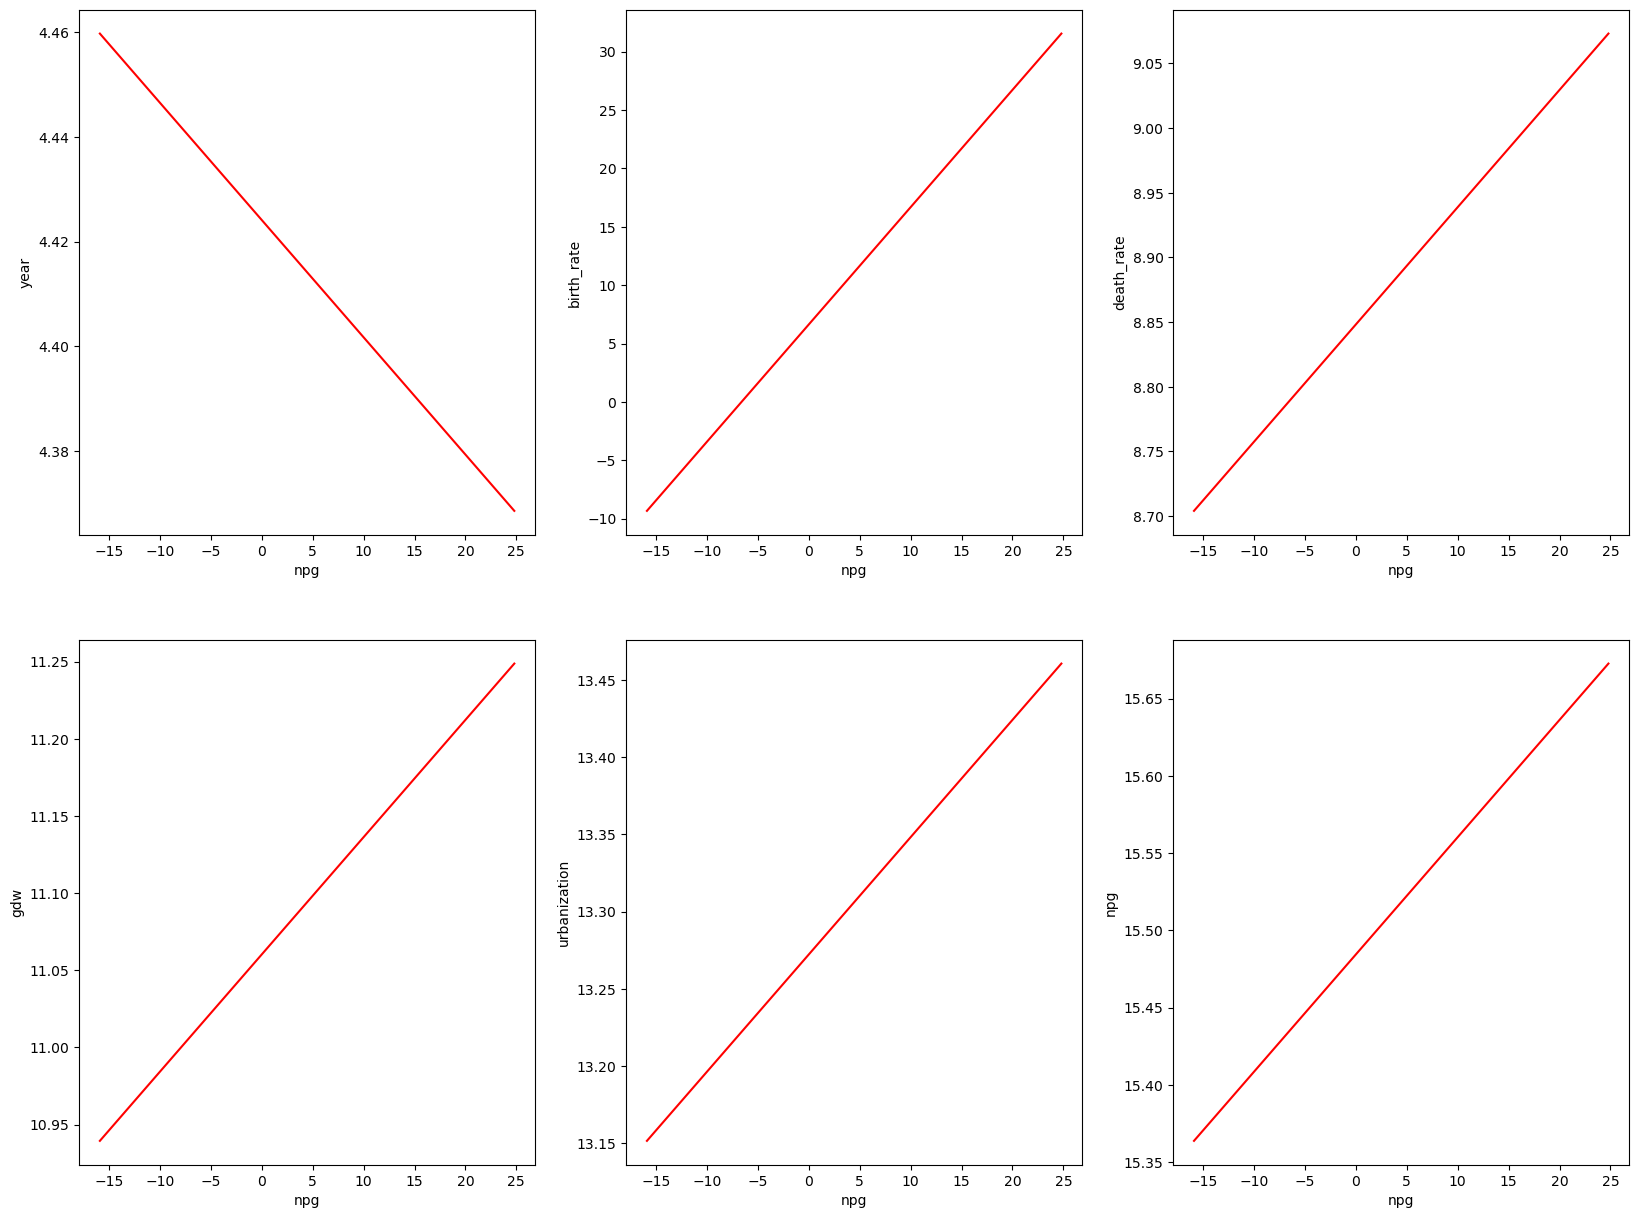

In [345]:
rows, cols = 2, 3
fig, axs = plt.subplots(rows, cols, figsize=(20, 15))

col_name = ['year', 'birth_rate', 'death_rate', 'gdw', 'urbanization', 'npg']
reg_coef = regressor.coef_.tolist()
reg_coef.append(0)
count = 0
y_lr = [regressor.intercept_ + reg_coef[count] * x[x_ind] for x_ind in range(len(x))]
for i in range(rows):
    for j in range(cols):
        urban_mean = df.groupby(by = 'npg')[col_name[count]].mean()
        x = list(urban_mean.index.tolist())
        y = list(urban_mean.tolist())
        # axs[i][j].scatter(x, y, color='b', label='Actual')
        for x_ind in range(len(x)):
            y_lr[x_ind] += reg_coef[count] * x[x_ind] + regressor.intercept_
        axs[i][j].plot(x, y_lr, color = 'red')
        axs[i][j].set_xlabel('npg')
        axs[i][j].set_ylabel(col_name[count])
        count+=1
    
plt.show()

In [244]:
df.head(10)

,Actual,Predicted
0,2000,2000.658047
1,1992,1997.019901
2,1996,2008.983049
3,1995,1997.939439
4,2003,2005.509434
5,1996,1999.042453
6,2013,2005.136553
7,1999,1996.839953
8,1996,2000.207523
9,1998,2002.965022
